In [8]:
#First we need to import our graphing library, and a library that helps us read csv files
from matplotlib import pyplot as plt
import csv

#found online, helper code to graph plots with multi-leveled x-labels
def mk_groups(data):
    try:
        newdata = data.items()
    except:
        return

    thisgroup = []
    groups = []
    for key, value in newdata:
        newgroups = mk_groups(value)
        if newgroups is None:
            thisgroup.append((key, value))
        else:
            thisgroup.append((key, len(newgroups[-1])))
            if groups:
                groups = [g + n for n, g in zip(newgroups, groups)]
            else:
                groups = newgroups
    return [thisgroup] + groups

def add_line(ax, xpos, ypos):
    line = plt.Line2D([xpos, xpos], [ypos + .1, ypos],
                      transform=ax.transAxes, color='black')
    line.set_clip_on(False)
    ax.add_line(line)

def label_group_bar(ax, data):
    groups = mk_groups(data)
    xy = groups.pop()
    x, y = zip(*xy)
    ly = len(y)
    xticks = range(1, ly + 1)

    ax.bar(xticks, y, align='center')
    ax.set_xticks(xticks)
    ax.set_xticklabels(x)
    ax.set_xlim(.5, ly + .5)
    ax.yaxis.grid(True)

    scale = 1. / ly
    for pos in range(ly + 1):
        add_line(ax, pos * scale, -.1)
    ypos = -.2
    while groups:
        group = groups.pop()
        pos = 0
        for label, rpos in group:
            lxpos = (pos + .5 * rpos) * scale
            ax.text(lxpos, ypos, label, ha='center', transform=ax.transAxes)
            add_line(ax, pos * scale, ypos)
            pos += rpos
        add_line(ax, pos * scale, ypos)
        ypos -= .1
####END HELPER CODE


def graph_object(obj):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    label_group_bar(ax, obj)
    fig.subplots_adjust(bottom=0.3)
    plt.show()
    

In [9]:
#variable where we will store data from the datafile
mass_data = {} 
time_data = {}
force_data = {}
speed_data = {}
acceleration_data = {}
KE_data = {}
work_data = {}
power_data = {}

import csv #import our library
#CSV INFO: here we are opening, then reading in our csv file
# the for-loop presents us with the data from each row in the csv as the variable named "row"
with open('Firearm-Lab-Datasheet.csv', newline='') as csvfile:#open the data file
    csvreader = csv.reader(csvfile, delimiter=',', quotechar='"')#send the open file to the csv reader
    next(csvreader,None)#skip the row of headers
    for row in csvreader:#read each row of data
        #print(', '.join(row))
        #END CSV INFO 
        
        #DATA IMPORT AND STORAGE
        #The following code first tests whether or not we have created our data object yet
        # and if not then we create it
        #Then we add the data from our csv row into our data objects
        #save mass data
        if row[0] not in mass_data:
            mass_data[row[0]]={}
        mass_data[row[0]][row[1]]=row[2]
        #save time data 
        if row[0] not in time_data:
            time_data[row[0]]={}
        time_data[row[0]][row[1]]=row[4]
        #save force data 
        if row[0] not in force_data:
            force_data[row[0]]={}
        force_data[row[0]][row[1]]=row[5]
        #save speed data 
        if row[0] not in speed_data:
            speed_data[row[0]]={}
        speed_data[row[0]][row[1]]=row[6]
        #save acceleration data 
        if row[0] not in acceleration_data:
            acceleration_data[row[0]]={}
        acceleration_data[row[0]][row[1]]=row[7]
        #save KE data 
        if row[0] not in KE_data:
            KE_data[row[0]]={}
        KE_data[row[0]][row[1]]=row[8]
        #save work data 
        if row[0] not in work_data:
            work_data[row[0]]={}
        work_data[row[0]][row[1]]=row[9]
        #save power data 
        if row[0] not in power_data:
            power_data[row[0]]={}
        power_data[row[0]][row[1]]=row[10]
        ##END DATA IMPORT 

        
print('Below is an example of what our data objects look like, in this case our mass data.')
print(mass_data)

Below is an example of what our data objects look like, in this case our mass data.
{'Weak': {'Plastic': '2', 'BB': '3', 'Metal': '4'}, 'Medium': {'Plastic': '2', 'BB': '3', 'Metal': '4'}, 'Strong': {'Plastic': '2', 'BB': '3', 'Metal': '4'}}


Here is our graph of mass data.


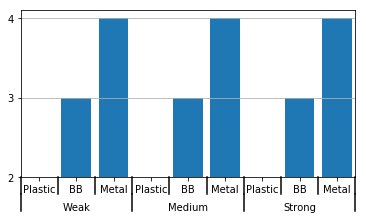

In [10]:
print('Here is our graph of mass data.')
graph_object(mass_data)

Here is our graph of time data.


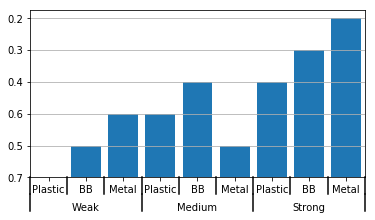

In [11]:
print('Here is our graph of time data.')
graph_object(time_data)

Here is our graph of force data.


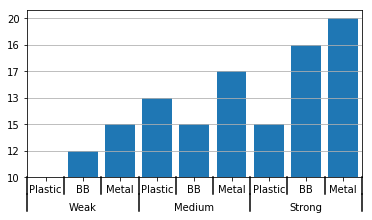

In [12]:
print('Here is our graph of force data.')
graph_object(force_data)

Here is our graph of speed data.


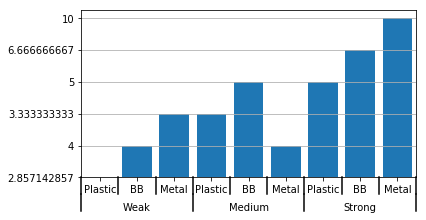

In [13]:
print('Here is our graph of speed data.')
graph_object(speed_data)

Here is our graph of acceleration data.


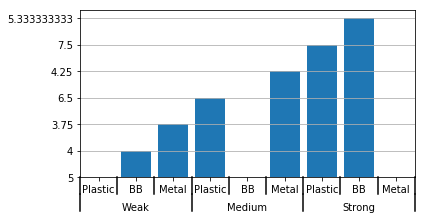

In [14]:
print('Here is our graph of acceleration data.')
graph_object(acceleration_data)

Here is our graph of KE data.


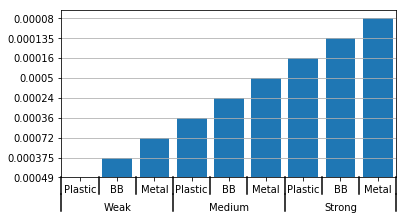

In [15]:
print('Here is our graph of KE data.')
graph_object(KE_data)

Here is our graph of work data.


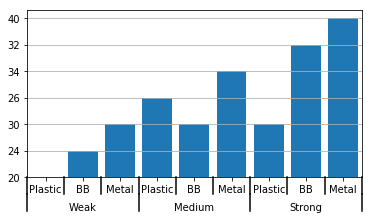

In [16]:
print('Here is our graph of work data.')
graph_object(work_data)

Here is our graph of power data.


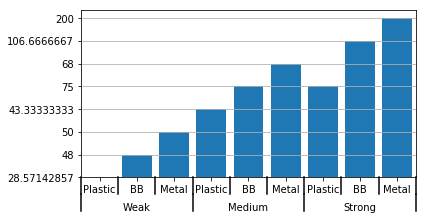

In [17]:
print('Here is our graph of power data.')
graph_object(power_data)
